In [1]:
%matplotlib inline

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.vgg19 import VGG19


# Image-Related Neural Networks

## Demos

In [3]:
model = Sequential([
    Input(shape = (20, 20, 3)),
    Conv2D(filters = 32, kernel_size = (3, 3), dilation_rate = (2, 2), padding = "same", activation = "relu")
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [36]:
model = Sequential([
    Input(shape = (20, 20, 3)),
    
    Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(filters = 8, kernel_size = (1, 1), padding = "same", activation = "relu"),
    MaxPool2D(),
    Flatten(),
    
    Dense(24, activation = "relu"),
    Dense(10, activation = "softmax")
])

In [37]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 20, 20, 32)        896       
                                                                 
 conv2d_36 (Conv2D)          (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 10, 10, 16)        4624      
                                                                 
 conv2d_38 (Conv2D)          (None, 10, 10, 16)        2320      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                 

In [16]:
model.layers[0].kernel

<tf.Variable 'conv2d_14/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[ 0.03913575, -0.0380801 ,  0.06073858,  0.09032962,
           0.12520589,  0.03304407, -0.00338924, -0.04138997,
          -0.01952073, -0.11673246, -0.12287989,  0.01597138,
           0.12956648,  0.06276406,  0.06226675, -0.05262617,
          -0.07671081, -0.10276592,  0.06191976, -0.03671159,
          -0.03758041, -0.01677912, -0.08454372,  0.04138531,
           0.13172095, -0.11367442, -0.03889625,  0.06585546,
          -0.07349439,  0.08328803, -0.08172683,  0.01908141],
         [-0.0668885 , -0.10647064,  0.00767608,  0.13733636,
           0.05613005, -0.1212788 , -0.10958052, -0.02520337,
           0.03324364,  0.06944551,  0.0208282 ,  0.05651964,
          -0.11745673, -0.09725653,  0.0940865 , -0.06553038,
          -0.13472374,  0.06536113, -0.08655368,  0.06544648,
          -0.06681815,  0.10730831, -0.11010822, -0.11956686,
          -0.01311168, -0.05229156,  0.11236002,  0.130

In [17]:
model.layers[0].kernel.numpy()

array([[[[ 0.03913575, -0.0380801 ,  0.06073858,  0.09032962,
           0.12520589,  0.03304407, -0.00338924, -0.04138997,
          -0.01952073, -0.11673246, -0.12287989,  0.01597138,
           0.12956648,  0.06276406,  0.06226675, -0.05262617,
          -0.07671081, -0.10276592,  0.06191976, -0.03671159,
          -0.03758041, -0.01677912, -0.08454372,  0.04138531,
           0.13172095, -0.11367442, -0.03889625,  0.06585546,
          -0.07349439,  0.08328803, -0.08172683,  0.01908141],
         [-0.0668885 , -0.10647064,  0.00767608,  0.13733636,
           0.05613005, -0.1212788 , -0.10958052, -0.02520337,
           0.03324364,  0.06944551,  0.0208282 ,  0.05651964,
          -0.11745673, -0.09725653,  0.0940865 , -0.06553038,
          -0.13472374,  0.06536113, -0.08655368,  0.06544648,
          -0.06681815,  0.10730831, -0.11010822, -0.11956686,
          -0.01311168, -0.05229156,  0.11236002,  0.13061203,
          -0.03884629,  0.09099893,  0.0840809 ,  0.12042414],
      

In [20]:
model.layers[6].kernel.numpy().shape

(3, 3, 16, 8)

In [21]:
model.layers[6].bias.numpy().shape

(8,)

In [22]:
dir(model.layers[2])

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_auto_config',
 '_auto_get_config',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_build_input_shape',
 '_call_spec',
 '_callable_losses',
 '_captured_weight_regularizer',
 '_cast_single_input',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compute_dtype',
 '_compute_dtype_object',
 '_dedup_weights',
 '_deferred_dependencies',
 '_delete_tracking',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_dt

In [23]:
model.layers[4].kernel.numpy()[:, :, :, 0]

array([[[-0.07865105, -0.08389782, -0.00420259, -0.04684199,
         -0.12190482, -0.08293334,  0.07395247, -0.11713149,
         -0.13209608,  0.13890955, -0.05520467,  0.03148544,
          0.11713436, -0.00115451, -0.09974854,  0.05045041],
        [-0.07352378, -0.06057626, -0.01471955,  0.01118968,
         -0.12274782,  0.03735505,  0.03062852,  0.11845154,
         -0.02021196, -0.03784185,  0.07909955,  0.05331272,
         -0.00332624,  0.01789753,  0.06867361, -0.04386993],
        [ 0.04250233,  0.08580483, -0.11041763, -0.03464662,
         -0.07314242, -0.12125875,  0.03815986, -0.03384512,
          0.03525838, -0.11745569,  0.13359842,  0.09680516,
         -0.11525279,  0.13475788, -0.08707818, -0.0521069 ]],

       [[-0.03099354,  0.1400865 ,  0.08933386, -0.02369401,
         -0.00757387, -0.01096463, -0.03384794, -0.066991  ,
         -0.02312334,  0.10169855,  0.09662792, -0.06428664,
          0.03805211, -0.11594831, -0.05191908, -0.1010884 ],
        [ 0.121711

In [24]:
model.layers[4].kernel.numpy()[:, :, 0, 0]

array([[-0.07865105, -0.07352378,  0.04250233],
       [-0.03099354,  0.12171167, -0.06970321],
       [-0.02933925,  0.1163606 , -0.1010819 ]], dtype=float32)

In [25]:
random_images = np.random.uniform(size = (5, 20, 20, 3))

In [26]:
model.predict(random_images)

1/1 [==============================] - 0s 217ms/step


array([[0.10642473, 0.09059221, 0.09839233, 0.10170307, 0.10036136,
        0.09916669, 0.0961889 , 0.10016534, 0.10843413, 0.09857123],
       [0.10759195, 0.08968449, 0.09754904, 0.10064383, 0.09882285,
        0.10090846, 0.09586415, 0.10125118, 0.10892092, 0.09876304],
       [0.10647239, 0.09018907, 0.09810207, 0.10222805, 0.10099284,
        0.0989885 , 0.09626501, 0.1006427 , 0.10826791, 0.09785154],
       [0.10754217, 0.08846515, 0.0976018 , 0.1016654 , 0.09977102,
        0.09976607, 0.09641875, 0.09954178, 0.11047801, 0.09874989],
       [0.10742829, 0.08967275, 0.09868308, 0.10294513, 0.10179675,
        0.09806462, 0.09535114, 0.09965989, 0.10940716, 0.09699112]],
      dtype=float32)

In [28]:
vgg19 = VGG19()

574710816/574710816 [==============================] - 338s 1us/step


In [29]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
generator = ImageDataGenerator()

In [50]:
images = generator.flow_from_directory("./data/natural_images/", batch_size = 4)

Found 6899 images belonging to 8 classes.


In [51]:
type(images)

keras.preprocessing.image.DirectoryIterator

In [52]:
images.__next__()

(array([[[[255., 254., 251.],
          [255., 254., 251.],
          [255., 254., 251.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 254., 251.],
          [255., 254., 251.],
          [255., 254., 251.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 254., 251.],
          [255., 254., 251.],
          [255., 254., 251.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         ...,
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.

In [53]:
images.__next__()[0].shape

(4, 256, 256, 3)

In [57]:
img = images.__next__()[0]

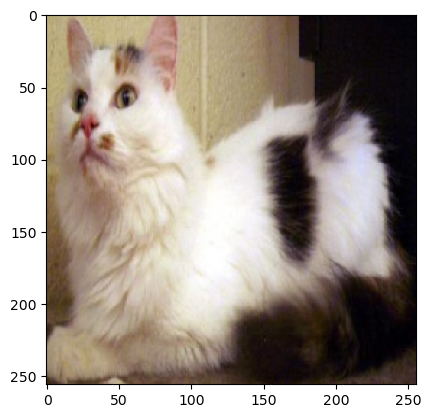

In [59]:
plt.imshow(img[0] / 255.0)

In [61]:
tf.data.Dataset.from_tensor_slices([1, 2, 3])

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [65]:
list(os.walk("./data/natural_images/"))

[('./data/natural_images/',
  ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person'],
  []),
 ('./data/natural_images/airplane',
  [],
  ['airplane_0000.jpg',
   'airplane_0001.jpg',
   'airplane_0002.jpg',
   'airplane_0003.jpg',
   'airplane_0004.jpg',
   'airplane_0005.jpg',
   'airplane_0006.jpg',
   'airplane_0007.jpg',
   'airplane_0008.jpg',
   'airplane_0009.jpg',
   'airplane_0010.jpg',
   'airplane_0011.jpg',
   'airplane_0012.jpg',
   'airplane_0013.jpg',
   'airplane_0014.jpg',
   'airplane_0015.jpg',
   'airplane_0016.jpg',
   'airplane_0017.jpg',
   'airplane_0018.jpg',
   'airplane_0019.jpg',
   'airplane_0020.jpg',
   'airplane_0021.jpg',
   'airplane_0022.jpg',
   'airplane_0023.jpg',
   'airplane_0024.jpg',
   'airplane_0025.jpg',
   'airplane_0026.jpg',
   'airplane_0027.jpg',
   'airplane_0028.jpg',
   'airplane_0029.jpg',
   'airplane_0030.jpg',
   'airplane_0031.jpg',
   'airplane_0032.jpg',
   'airplane_0033.jpg',
   'airplane_0034.jpg',
   '

In [67]:
os.listdir("./data/natural_images/")

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [147]:
BASE_DIR = "./data/natural_images/"
IMAGE_SIZE = (256, 256)

classes = os.listdir(BASE_DIR)
folder_names = [os.path.join(BASE_DIR, class_name) for class_name in classes]


In [78]:
classes

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [79]:
folder_names

['./data/natural_images/airplane',
 './data/natural_images/car',
 './data/natural_images/cat',
 './data/natural_images/dog',
 './data/natural_images/flower',
 './data/natural_images/fruit',
 './data/natural_images/motorbike',
 './data/natural_images/person']

In [80]:
for folder_name in folder_names:
    files = os.listdir(folder_name)
    print([folder_name + "/" + file for file in files])
    break

['./data/natural_images/airplane/airplane_0000.jpg', './data/natural_images/airplane/airplane_0001.jpg', './data/natural_images/airplane/airplane_0002.jpg', './data/natural_images/airplane/airplane_0003.jpg', './data/natural_images/airplane/airplane_0004.jpg', './data/natural_images/airplane/airplane_0005.jpg', './data/natural_images/airplane/airplane_0006.jpg', './data/natural_images/airplane/airplane_0007.jpg', './data/natural_images/airplane/airplane_0008.jpg', './data/natural_images/airplane/airplane_0009.jpg', './data/natural_images/airplane/airplane_0010.jpg', './data/natural_images/airplane/airplane_0011.jpg', './data/natural_images/airplane/airplane_0012.jpg', './data/natural_images/airplane/airplane_0013.jpg', './data/natural_images/airplane/airplane_0014.jpg', './data/natural_images/airplane/airplane_0015.jpg', './data/natural_images/airplane/airplane_0016.jpg', './data/natural_images/airplane/airplane_0017.jpg', './data/natural_images/airplane/airplane_0018.jpg', './data/nat

In [109]:
all_files = []
all_classes = []
for folder_name, class_name in zip(folder_names, classes):
    files = os.listdir(folder_name)
    all_files.extend([os.path.join(folder_name, file) for file in files])
    all_classes.extend([class_name] * len(files))

In [110]:
all_files

['./data/natural_images/airplane\\airplane_0000.jpg',
 './data/natural_images/airplane\\airplane_0001.jpg',
 './data/natural_images/airplane\\airplane_0002.jpg',
 './data/natural_images/airplane\\airplane_0003.jpg',
 './data/natural_images/airplane\\airplane_0004.jpg',
 './data/natural_images/airplane\\airplane_0005.jpg',
 './data/natural_images/airplane\\airplane_0006.jpg',
 './data/natural_images/airplane\\airplane_0007.jpg',
 './data/natural_images/airplane\\airplane_0008.jpg',
 './data/natural_images/airplane\\airplane_0009.jpg',
 './data/natural_images/airplane\\airplane_0010.jpg',
 './data/natural_images/airplane\\airplane_0011.jpg',
 './data/natural_images/airplane\\airplane_0012.jpg',
 './data/natural_images/airplane\\airplane_0013.jpg',
 './data/natural_images/airplane\\airplane_0014.jpg',
 './data/natural_images/airplane\\airplane_0015.jpg',
 './data/natural_images/airplane\\airplane_0016.jpg',
 './data/natural_images/airplane\\airplane_0017.jpg',
 './data/natural_images/airp

In [111]:
len(all_files)

6899

In [112]:
all_classes

['airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',

In [113]:
list(enumerate(classes))

[(0, 'airplane'),
 (1, 'car'),
 (2, 'cat'),
 (3, 'dog'),
 (4, 'flower'),
 (5, 'fruit'),
 (6, 'motorbike'),
 (7, 'person')]

In [114]:
dict(enumerate(classes))

{0: 'airplane',
 1: 'car',
 2: 'cat',
 3: 'dog',
 4: 'flower',
 5: 'fruit',
 6: 'motorbike',
 7: 'person'}

In [115]:
class_mapping = {class_name: class_id for (class_id, class_name) in list(enumerate(classes))}

In [116]:
all_class_ids = [class_mapping[c] for c in all_classes]

In [117]:
all_classes

['airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',
 'airplane',

In [118]:
all_class_ids[0]

0

In [148]:
def read_image(image_filename, image_class):
    image_file = tf.io.read_file(image_filename)
    image = tf.image.decode_jpeg(image_file)
    image_scalled = tf.cast(image, float) / 255.0
    image_resized = tf.image.resize(image_scalled, IMAGE_SIZE)
    return image_resized, image_class

In [164]:
dataset = tf.data.Dataset \
    .from_tensor_slices((all_files, all_class_ids)) \
    .shuffle(len(all_files)) \
    .map(read_image) \
    .batch(4) \
    .repeat()

In [165]:
for el in dataset.take(1):
    print(el[0].numpy().shape, el[1].numpy().shape)

(4, 256, 256, 3) (4,)


In [166]:
for el in dataset.take(1):
    print(el[0].numpy(), el[1].numpy())

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1. 

In [167]:
model = Sequential([
    Input(shape = (256, 256, 3)),
    
    Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(filters = 8, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 8, kernel_size = (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(32, activation = "relu"),
    Dense(8, activation = "softmax")
])

In [168]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam")

In [169]:
model.fit(dataset, epochs = 10, steps_per_epoch = len(all_files) // 4)

Epoch 1/10
   9/1724 [..............................] - ETA: 7:50 - loss: 2.1160

KeyboardInterrupt: 